In [2]:
#Importing Basic Libraries
import pandas as pd
import numpy as np

In [3]:
#Basic Command
print("Hello Capstone Project Course")

Hello Capstone Project Course


#Week 1: Problem Description & Background- Introduction and Business Understanding

##Introduction and Project Aims
According to online sources, the USA experiences an average of approximately 102 vehicle crashes per day. From approximately 6 million crashes a year, over 35,000 crashes are fatal.
To imporve the country's road safety, it is important to understand the the causes of accidents as well as the conditions leading to the incident.

Moreover, understanding the factors prior to the incidents through graphical and statistical analysis, including the level of severity, liklihood of collisions, and probaility of injury; can
further improve the education sector within road safety as well as give governmental bodies the data needed to build safer roads and raise awareness of the main factors and conditions leading to road incidents.

The aim of this project is to use publicly available data- published by the Seattle Deport of Transportation (SDOT) in the form of a dataset, to indentify the relevant information that allow for the comprehension
on the number, injuries, and severity of collision occur in Seattle.

The data will be analysed mathematically and graphically through data science methodologies such as data visualisation tools and machine learning models in order to provide insight on traffic collisions in Seattle.

##Data Understanding
The data used througout this project is extracted from the SDOT's website entitled "Collisions-All Years". This dataset includes all types of collisions, whether be vehicle, bicycle or pedestrian, filed by the
Seattle Police Department. 

The dataset provided includes 65,000 collisions from 2004 to present day, updated on a weekly basis. The severity is also an important factor that is incorporated within the collisions dataset with 5 codes, explained:
- 0: unknown
- 1: property damage
- 2: injury
- 2b: serious injury
- 3: fatality

The actual dataset only includes codes 1 and 2 without the inclusion of any other alternatives; but gives 37 attributes related to the collisions reported such as day, time, month, weather etc. All of which will be used 
to build our model and explain trends related to traffic collisions.

The full description of the data can be found at: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf




#Week 2: Project Deliverables

###Importing Required Libraries & Tools

In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl


### Importing & Understanding the Dataset

In [81]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f106fc923389496b89b03be78f07e4e6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yYOjQ3umtoQY_CWTHtxYE2H-HZUaf8mkaLuvUn9yPL7U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f106fc923389496b89b03be78f07e4e6.get_object(Bucket='courseracapstone-donotdelete-pr-ggcn4niqlt38ho',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [82]:
# List of Columns
df_data_1.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [83]:
# Check Data that has missing values
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [84]:
# Check size of Data
df_data_1.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [85]:
# The columns with mostly null values will be dropped
df_data_1.drop(columns = ['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','SDOTCOLNUM'],axis = 1,inplace = True)

In [86]:
# Drop columns that will not be beneficial throughout the project
df_data_1.drop(columns = ['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION','SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','HITPARKEDCAR'],axis = 1,inplace = True)

In [87]:
# The Severity Code, Weather, Road Condition, and Light Condition are the main driving factors
df_data_1.head(10)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


## Adjusting All Data with NaN Values

In [88]:
#The data values for Weather, Road Condition, and Light Condition are shown below with the number of NaN Values
df_data_1.isna().sum()

SEVERITYCODE       0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [89]:
#We need to adjust each of the 4 factors by replacing NaN values with unknown values
#Weather
df_data_1['WEATHER'].replace(np.NaN, "Unknown", inplace=True)
df_data_1['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      20172
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [90]:
#Road Condition
df_data_1['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)
df_data_1['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            20090
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [91]:
#Light Condition
df_data_1['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)
df_data_1['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      18643
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [92]:
#Check Data 
df_data_1.isna().sum()

SEVERITYCODE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

#Exploratory Data Analysis

In [93]:
###This section is catered towards understanding relationships between the Severity of Accidents and other factors

In [94]:
severity_code = df_data_1['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
df_data_1["SEVERITYCODE"] = severity_code

Accidents in each severity level:


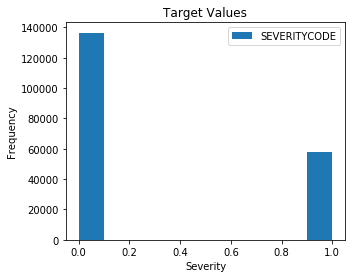

In [95]:
#Graphical Representation of Frequency versus Severity Plot and Pie Chart
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_data_1.plot.hist(figsize=(5,4))
plt.title('Target Values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents in each severity level:')

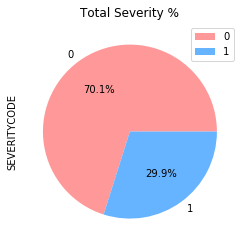

In [96]:
import matplotlib.pyplot as plt
colors = ['#ff9999','#66b3ff']
df_data_1['SEVERITYCODE'].value_counts().to_frame().plot(kind='pie', colors= colors, y='SEVERITYCODE',autopct='%1.1f%%')
plot.title('Total Severity %')
plot.show()

In [97]:
#Number of Severity Counts
print(df_data_1.SEVERITYCODE.value_counts())

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64


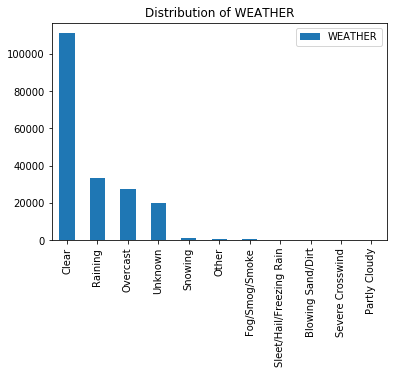

In [98]:
#Distribution of Weather
df_data_1['WEATHER'].value_counts().to_frame().plot(kind='bar', y='WEATHER')
plot.title('Distribution of WEATHER')
plot.show()

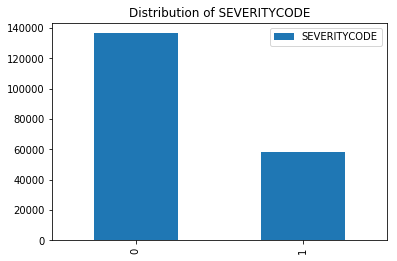

In [99]:
#Distribution of Severity Code
df_data_1['SEVERITYCODE'].value_counts().to_frame().plot(kind='bar', y='SEVERITYCODE')
plot.title('Distribution of SEVERITYCODE')
plot.show()

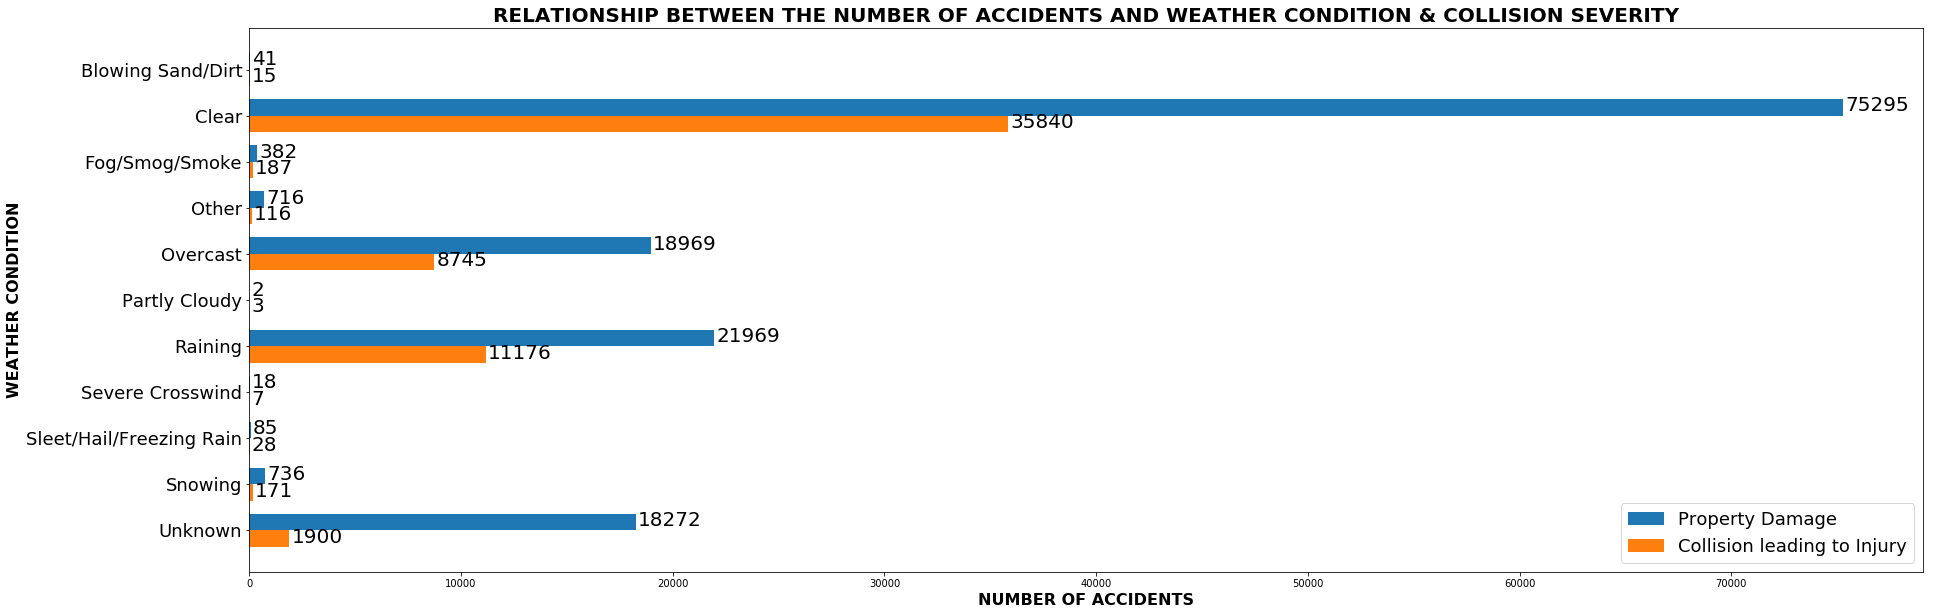

In [100]:
#Relationship between number of accidents and weather conditions & collision severity
labels = sorted(df_data_1['WEATHER'].unique())
property_damage_Only_Collision = list(df_data_1.SEVERITYCODE.eq(0).astype('int').groupby(df_data_1.WEATHER,sort=True).sum())
Injury_Collision = list(df_data_1.SEVERITYCODE.eq(1).astype('int').groupby(df_data_1.WEATHER,sort=True).sum())
y = np.arange(len(labels))  # the label locations
height = 0.36  # the width of the bars

fig, ax = plot.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='Property Damage')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Collision leading to Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('NUMBER OF ACCIDENTS',size=16,fontweight='bold')
ax.set_ylabel('WEATHER CONDITION',size=16,fontweight='bold')
ax.set_title('RELATIONSHIP BETWEEN THE NUMBER OF ACCIDENTS AND WEATHER CONDITION & COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=18)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.27,\
            str(i.get_width()), fontsize=20, color='black',size=20,)

ax.invert_yaxis()
fig.set_size_inches(30,10)
plot.show()

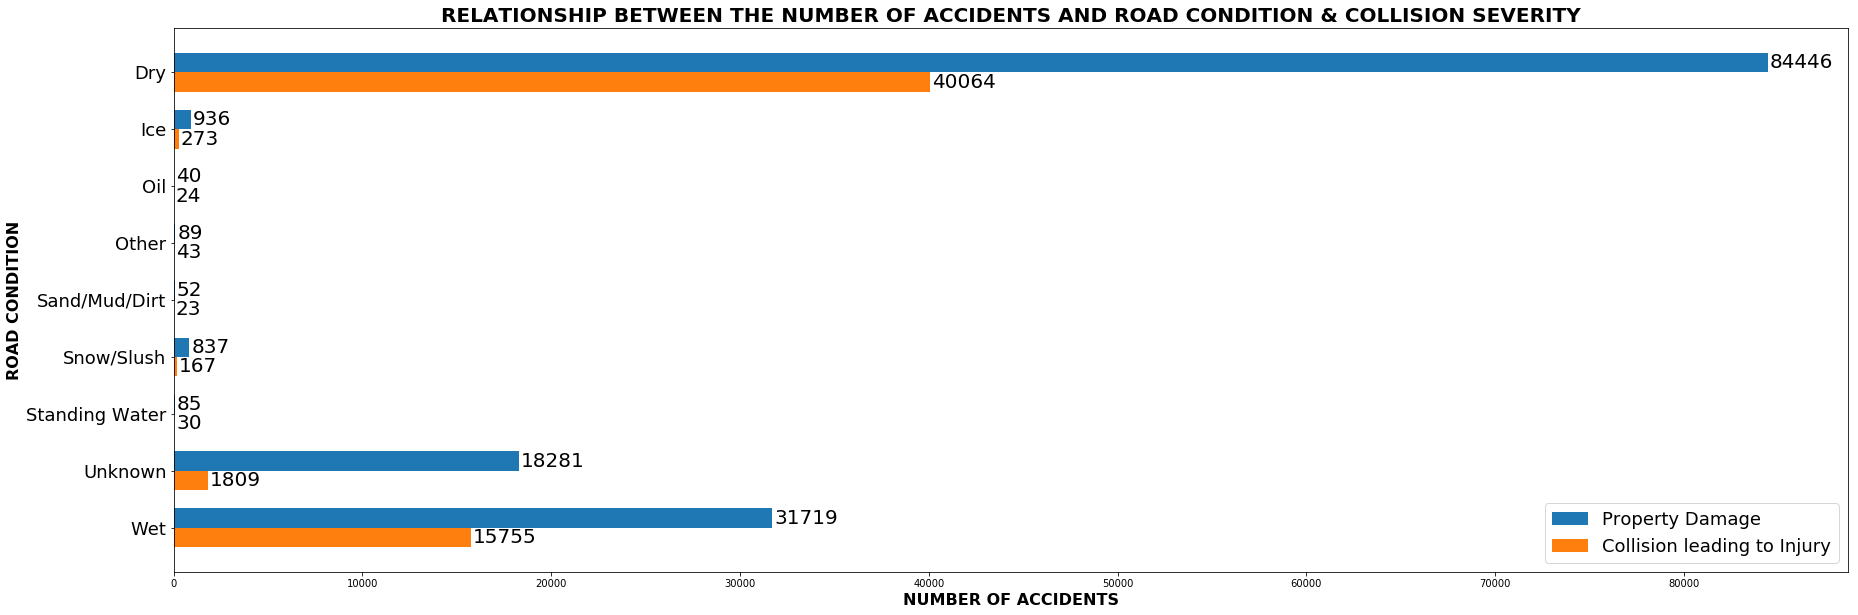

In [101]:
#Relationship between number of accidents and road conditions & collision severity
labels = sorted(df_data_1['ROADCOND'].unique())
property_damage_Only_Collision = list(df_data_1.SEVERITYCODE.eq(0).astype('int').groupby(df_data_1.ROADCOND,sort=True).sum())
Injury_Collision = list(df_data_1.SEVERITYCODE.eq(1).astype('int').groupby(df_data_1.ROADCOND,sort=True).sum())
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plot.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='Property Damage')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Collision leading to Injury')

ax.set_xlabel('NUMBER OF ACCIDENTS',size=16,fontweight='bold')
ax.set_ylabel('ROAD CONDITION',size=16,fontweight='bold')
ax.set_title('RELATIONSHIP BETWEEN THE NUMBER OF ACCIDENTS AND ROAD CONDITION & COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=18)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.27,\
            str(i.get_width()), fontsize=20, color='black',size=20,)

ax.invert_yaxis()
fig.set_size_inches(30,10)
plot.show()

#Data Preparation

In [17]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f106fc923389496b89b03be78f07e4e6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yYOjQ3umtoQY_CWTHtxYE2H-HZUaf8mkaLuvUn9yPL7U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f106fc923389496b89b03be78f07e4e6.get_object(Bucket='courseracapstone-donotdelete-pr-ggcn4niqlt38ho',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

In [18]:
df_data_1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [19]:
df_data_1.drop(columns = ['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','SDOTCOLNUM'],axis = 1,inplace = True)

In [20]:
df_data_1.drop(columns = ['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION','SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','HITPARKEDCAR'],axis = 1,inplace = True)

In [21]:
df_data_1.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [22]:
df_data_1.dtypes
df_data_1['ROADCOND'].astype(str)
df_data_1['LIGHTCOND'].astype(str)
df_data_1['WEATHER'].astype(str)
df_data_1.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [23]:
#Weather
df_data_1['WEATHER'].replace(np.NaN, "Unknown", inplace=True)

In [24]:
#Road Condition
df_data_1['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [25]:
#Light Condition
df_data_1['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [26]:
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df_data_1.replace(encoding_WEATHER, inplace=True)
df_data_1['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [27]:
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df_data_1.replace(encoding_ROADCOND, inplace=True)
df_data_1['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [28]:
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df_data_1.replace(encoding_LIGHTCOND, inplace=True)
df_data_1['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [29]:
Conditions= df_data_1[['WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [30]:
X=Conditions
Y=df_data_1['SEVERITYCODE'].values

In [32]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 1.91514317,  1.3926872 , -0.66472702],
       [ 0.64986567,  1.3926872 ,  1.50437693],
       [ 1.91514317, -0.53629605, -0.66472702],
       [-0.61541182, -0.53629605, -0.66472702],
       [ 0.64986567,  1.3926872 , -0.66472702]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [34]:
X_train2= X_train[~np.isnan(X_train)]
X_train2[0:10]

array([-0.61541182, -0.53629605, -0.66472702,  1.91514317, -0.53629605,
       -0.66472702, -0.61541182, -0.53629605, -0.66472702, -0.61541182])

In [35]:
X_train

array([[-0.61541182, -0.53629605, -0.66472702],
       [ 1.91514317, -0.53629605, -0.66472702],
       [-0.61541182, -0.53629605, -0.66472702],
       ...,
       [-0.61541182, -0.53629605, -0.66472702],
       [-0.61541182, -0.53629605,  1.50437693],
       [ 0.64986567,  1.3926872 ,  1.50437693]])

In [36]:
y_train

array([1, 1, 2, ..., 1, 1, 1])

#Modelling using Machine Learining Techniques

##This section will include K-Nearest Neighbor Algorithm, Decision Trees, and Logistic Regression models.

###K-Nearest Neighbor Algorithm

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [40]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [41]:
#Accuracy Evaluation  
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6993925695719735
Test set Accuracy:  0.7031976370874534


In [42]:
#Calculated accuracy of KNN for different Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67648645, 0.70306922, 0.67281366, 0.70319764, 0.68162322,
       0.70409657, 0.70345448, 0.70409657, 0.70383973])

In [43]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7040965712084243 with k= 6


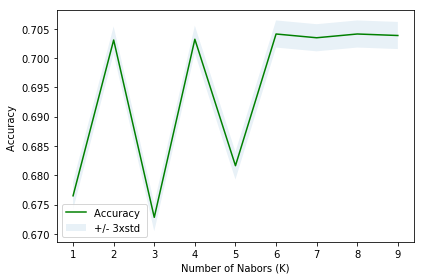

In [44]:
#Plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

KnnJaccard = jaccard_similarity_score(y_test, yhat)
KnnF1 = f1_score(y_test, yhat, average='weighted')
print("K-Nearest Neighbors Average F1-score: %.7f" % KnnF1 )
print("K-Nearest Neighbors Jaccard Score: %.7f" % KnnJaccard )

K-Nearest Neighbors Average F1-score: 0.5822889
K-Nearest Neighbors Jaccard Score: 0.7043534


###Logistic Regression Model

In [45]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.68356804, 0.31643196],
       [0.67078904, 0.32921096],
       [0.67593184, 0.32406816],
       ...,
       [0.70746524, 0.29253476],
       [0.68269417, 0.31730583],
       [0.68356804, 0.31643196]])

In [51]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7043790933607295

In [52]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[27425     0]
 [    0     0]]


Confusion matrix, without normalization
[[27425     0]
 [    0     0]]


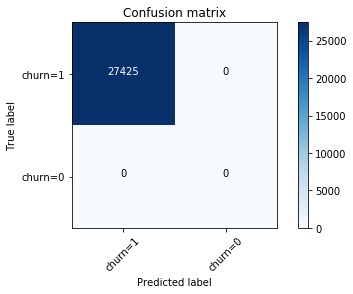

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6068093485491171

In [70]:
###Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
yhat_dtc = dtc.predict(X_test)

In [75]:
# Accuracy:
len(yhat_dtc[yhat_dtc==y_test])/len(y_test)

0.7043534095287017